# Exploring the evolution of Linux

<strong>Importing and cleaning project.</strong>

The dataset was created using the command <code>git log --encoding=latin-1 --pretty="%at#%aN" > git_log.csv</code> in Feb 2020 and zipped.<br>
This file is headerless with two columns 'timestamp' and 'author'. The separator is '#'.

In [1]:
import pandas as pd

In [35]:
git_log = pd.read_csv('data_files/git_log.zip', sep='#', encoding='latin-1', header=None, names=['timestamp', 'author'])
git_log.head(5)

,timestamp,author
0,1581305774,Randy Dunlap
1,1581532122,Linus Torvalds
2,1581468728,Linus Torvalds
3,1581467958,Linus Torvalds
4,1581376010,Tom Zanussi


## Overview
This dataset containing the information about every commit.

In [23]:
number_of_commits = git_log.shape[0]
number_of_authors = len(git_log['author'].dropna().unique())

In [26]:
print('{} authors committed {} code changes.'.format(number_of_authors, number_of_commits))

21248 authors committed 900376 code changes.


## Finding the top 10 authors

In [37]:
top_10_authors = git_log['author'].value_counts()[:10]

In [38]:
top_10_authors

Linus Torvalds           29145
David S. Miller          12374
Takashi Iwai              7465
Mark Brown                7407
Arnd Bergmann             7128
Al Viro                   6758
Mauro Carvalho Chehab     6263
H Hartley Sweeten         5942
Greg Kroah-Hartman        5833
Ingo Molnar               5820
Name: author, dtype: int64

## Transforming epoch time stamps to Timestamp

In [39]:
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit='s')

In [40]:
git_log['timestamp'].describe()

count                  900376
unique                 864489
top       2017-10-31 17:56:19
freq                      137
first     1970-01-01 00:00:01
last      2085-06-18 15:57:19
Name: timestamp, dtype: object

#### Treating wrong timestamps
The dataset has some wrong timestamps. May be contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the dataset by dropping the rows with the incorrect timestamps.<br>
Let's take the first commit from Linus Torvalds as the begining and the last commit should be earlier than 02/14/2020.

In [130]:
first_commit_timestamp = git_log.query("author == 'Linus Torvalds'").iloc[-1, :].timestamp

last_date = pd.Timestamp(2020, 2, 14)
last_commit_timestamp = git_log.query('timestamp <= @last_date').timestamp.max()

corrected_log = git_log[(git_log['timestamp'] >= first_commit_timestamp) & (git_log['timestamp'] <= last_commit_timestamp)]

In [131]:
corrected_log['timestamp'].describe()

count                  899874
unique                 864018
top       2017-10-31 17:56:19
freq                      137
first     2005-04-16 22:20:36
last      2020-02-12 18:28:42
Name: timestamp, dtype: object

## Analize the activity by groupping commits per year

In [132]:
commits_per_year = corrected_log.groupby(pd.Grouper(key='timestamp', freq='AS')).count()
commits_per_year.head(5)

,author
timestamp,
2005-01-01,16229
2006-01-01,29255
2007-01-01,33759
2008-01-01,48847
2009-01-01,52572


In [137]:
max_count_per_year = commits_per_year.author.max()
year_with_most_commits = commits_per_year.query('author == @max_count_per_year').index.item()
year_with_most_commits.year

2019

In [134]:
%matplotlib inline

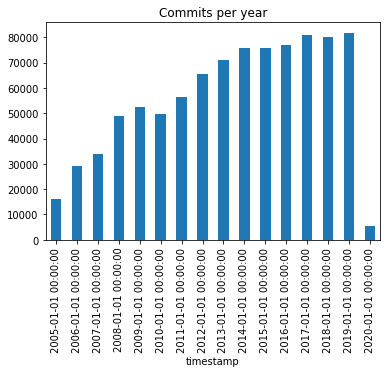

In [135]:
commits_per_year.plot(kind='bar', title='Commits per year', legend=False)